# Importei o dataset

In [15]:
import pandas as pd

dados = pd.read_csv('/home/renato/Projetos_Python/Machine_Learning_Cafe/coffee-price-prediction/data/processed/coffee.csv')

dados.head()

,Date,Open,High,Low,Close,Volume,Currency
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


# Verificando as informações sobre o tipo de dados de cada coluna

In [16]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      5746 non-null   object 
 1   Open      5746 non-null   float64
 2   High      5746 non-null   float64
 3   Low       5746 non-null   float64
 4   Close     5746 non-null   float64
 5   Volume    5746 non-null   int64  
 6   Currency  5746 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 314.4+ KB


# Transformando as datas no tipo 'datetime'

In [17]:
dados['Date'] = pd.to_datetime(dados['Date'], format='%Y-%m-%d')

In [18]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5746 entries, 0 to 5745
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      5746 non-null   datetime64[ns]
 1   Open      5746 non-null   float64       
 2   High      5746 non-null   float64       
 3   Low       5746 non-null   float64       
 4   Close     5746 non-null   float64       
 5   Volume    5746 non-null   int64         
 6   Currency  5746 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 314.4+ KB


Traduzindo o nome das colunas

In [19]:
valores_traduzidos = {
    'Date' : 'Data',
    'Open' : 'Abertura',
    'High' : 'Maior_valor_dia',
    'Low' : 'Menor_valor_dia',
    'Close' : 'Fechamento_dia',
    'Volume' : 'Volume',
    'Currency' : 'Moeda',
}

dados = dados.rename(columns= valores_traduzidos)

# Verificando qual é a primeira data do Dataset

In [20]:
primeira_data = dados['Data'].min()
ultima_data = dados['Data'].max()

print("A primeira data do dataset é:", primeira_data)
print("A primeira data do dataset é:", ultima_data)

A primeira data do dataset é: 2000-01-03 00:00:00
A primeira data do dataset é: 2022-09-02 00:00:00


In [21]:
dados.head()

,Data,Abertura,Maior_valor_dia,Menor_valor_dia,Fechamento_dia,Volume,Moeda
0,2000-01-03,122.25,124.00,116.10,116.50,6640,USD
1,2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2,2000-01-05,115.00,121.00,115.00,118.60,6165,USD
3,2000-01-06,119.00,121.40,116.50,116.85,5094,USD
4,2000-01-07,117.25,117.75,113.80,114.15,6855,USD


# Verificando se existem dados nulos ou NaN

In [22]:
dados.isnull().sum()

Data               0
Abertura           0
Maior_valor_dia    0
Menor_valor_dia    0
Fechamento_dia     0
Volume             0
Moeda              0
dtype: int64

In [23]:
dados.isna().sum()

Data               0
Abertura           0
Maior_valor_dia    0
Menor_valor_dia    0
Fechamento_dia     0
Volume             0
Moeda              0
dtype: int64

# Verificando se a amostras duplicadas

In [24]:
dados.duplicated().sum()

0

# Deletando colunas que não são importantes para a predição

In [25]:
dados = dados.drop(['Volume', 'Moeda'], axis = 1)

# Verificando se a outliers nos dados

In [26]:
dados.describe()

,Data,Abertura,Maior_valor_dia,Menor_valor_dia,Fechamento_dia
count,5746,5746.000000,5746.000000,5746.000000,5746.000000
mean,2011-05-17 10:11:14.138531072,127.267635,128.847034,125.784669,127.215567
min,2000-01-03 00:00:00,41.500000,42.000000,41.500000,41.500000
25%,2005-10-11 06:00:00,98.800000,100.112500,97.862500,98.650000
50%,2011-05-16 12:00:00,120.400000,121.600000,118.950000,120.250000
75%,2016-12-19 18:00:00,144.800000,146.000000,143.000000,144.337500
max,2022-09-02 00:00:00,305.300000,306.250000,304.000000,304.900000
std,NaN,50.569425,51.164948,49.851487,50.506519


# Construindo o modelo de previsão do Keras

In [27]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.initializers import GlorotNormal
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

2023-07-11 11:54:06.203948: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 11:54:06.226234: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-11 11:54:06.226706: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2023-07-11 11:54:06.868602: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [28]:
window_size = 20
prediction_size = 60

In [29]:
X = []
y = []

for i in range(len(dados)-window_size-prediction_size+1):
    X.append(dados.iloc[i:i+window_size]["Fechamento_dia"].values)
    y.append(dados.iloc[window_size+i+prediction_size-1]["Fechamento_dia"])

X = np.array(X)
y = np.array(y)


X = X.reshape(len(X), window_size, 1)

# SEPARAÇÃO TREINO E TESTE

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
units = 150

activation = "relu"

input_shape = (window_size, 1)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

loss = "mean_squared_error"


def r2_keras(y_true, y_pred):
    SS_res =  tf.keras.backend.sum(tf.keras.backend.square( y_true - y_pred ))
    SS_tot = tf.keras.backend.sum(tf.keras.backend.square( y_true - tf.keras.backend.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + tf.keras.backend.epsilon()) )


tf.random.set_seed(42)
model = tf.keras.models.Sequential(
    [
        # -- LSTM ---------------------------------------------
        tf.keras.layers.LSTM(
            units,
            activation=activation,
            input_shape=input_shape,
            kernel_initializer=GlorotNormal(seed=42),
        ),
        
        # -- Dense ---------------------------------------------
        tf.keras.layers.Dense(1, activation="linear", kernel_initializer=GlorotNormal(seed=42))
    ]
)

tf.random.set_seed(42)
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=[r2_keras],
)

In [36]:
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=50,
    validation_split=0.1,
    verbose=1,
)

Epoch 1/50
56/56 [==============================] - 1s 11ms/step - loss: 7747.3779 - r2_keras: -2.2333 - val_loss: 24090.7637 - val_r2_keras: -7.8892
Epoch 2/50
56/56 [==============================] - 0s 9ms/step - loss: 7400.3223 - r2_keras: -2.3398 - val_loss: 475.3526 - val_r2_keras: 0.8358
Epoch 3/50
56/56 [==============================] - 0s 8ms/step - loss: 448.6872 - r2_keras: 0.8155 - val_loss: 456.5819 - val_r2_keras: 0.8349
Epoch 4/50
56/56 [==============================] - 0s 8ms/step - loss: 465.4258 - r2_keras: 0.8102 - val_loss: 494.5287 - val_r2_keras: 0.8293
Epoch 5/50
56/56 [==============================] - 0s 8ms/step - loss: 454.8359 - r2_keras: 0.8126 - val_loss: 422.4767 - val_r2_keras: 0.8482
Epoch 6/50
56/56 [==============================] - 0s 8ms/step - loss: 442.3619 - r2_keras: 0.8168 - val_loss: 436.1669 - val_r2_keras: 0.8429
Epoch 7/50
56/56 [==============================] - 0s 8ms/step - loss: 433.8661 - r2_keras: 0.8232 - val_loss: 450.8503 - val_r

# Verificando taxa de acerto do modelo

In [33]:
y_train_pred = model.predict(X_train).flatten()
y_test_pred = model.predict(X_test).flatten()

metrics = {
    "MAE_train": mean_absolute_error(y_train, y_train_pred),
    "MAE_test": mean_absolute_error(y_test, y_test_pred),
    "R2_train": r2_score(y_train, y_train_pred),
    "R2_test": r2_score(y_test, y_test_pred),
}
metrics

54/54 [==============================] - 0s 2ms/step


{'MAE_train': 14.992046037213225,
 'MAE_test': 14.922344846013432,
 'R2_train': 0.8498921824685893,
 'R2_test': 0.8530631827903743}

# Plotando Gráfico de preço futuro do café

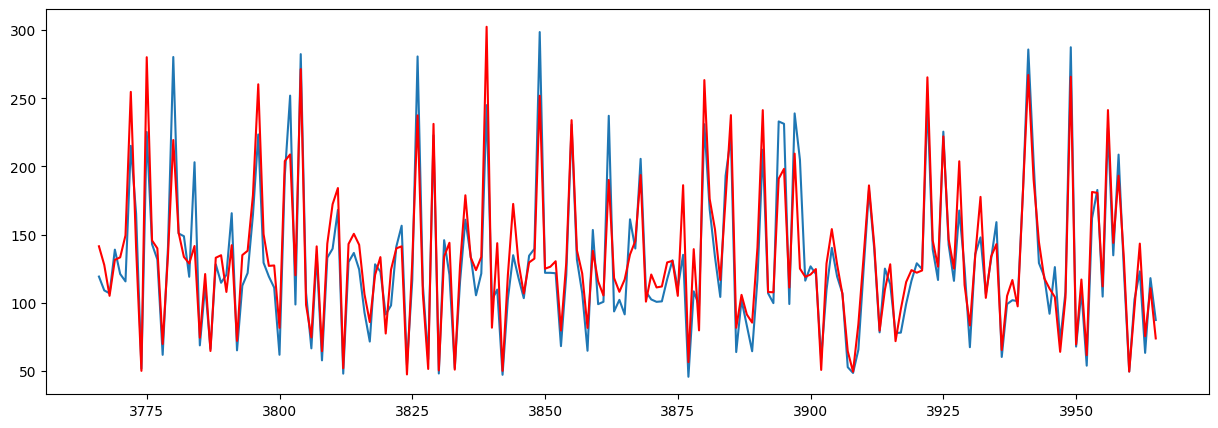

In [34]:
n = 200
x_ = np.array([i for i in range(len(y_train))])

plt.figure(figsize=(15,5))
plt.plot(x_[-n:],y_test[-n:])
plt.plot(x_[-n:],y_test_pred[-n:], c="r")

plt.show()